<a href="https://colab.research.google.com/github/samjeffcoat/100daysofJS/blob/main/Ohio_State_StatsBomb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install jovian opendatasets numpy pandas-profiling nfl_data_py matplotlib seaborn folium plotly --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 85.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 90.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 80.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 KB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 110.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 104.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
import seaborn as sns
sns.set(style="darkgrid")
import folium
import plotly.graph_objects as go
import nfl_data_py as nflpy
import plotly
import plotly.express as px

In [6]:
play_by_play = pd.read_csv('/content/Ohio State 2022 Play by Play Data.csv')

In [7]:
event_data_ = pd.read_csv('/content/Ohio State 2022 Event Data.csv')

<ipython-input-7-7a020d1bdfb4>:1: DtypeWarning: Columns (23,42,48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  event_data_ = pd.read_csv('/content/Ohio State 2022 Event Data.csv')


In [8]:
play_by_play.head()

,offense_team_name,defense_team_name,play_uuid,game_id,drive_uuid,play_game_index,play_drive_index,play_quarter,play_quarter_clock_remaining,play_clock_paused,...,play_formation_type,play_formation_run_strength,play_formation_pass_strength,play_formation_fib,play_formation_variant_f_on,play_formation_variant_h_on,play_formation_variant_x_on,play_formation_variant_y_on,play_formation_variant_z_on,play_pass_location
0,Iowa Hawkeyes,Ohio State Buckeyes,3056d7bc-b1f8-47f4-bb80-0f23629644fb,1500444,edcbaddc-3b3e-499e-84d1-f000cdb79727,1,1,1,900000.0,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iowa Hawkeyes,Ohio State Buckeyes,53874961-6df6-418d-9982-34f9d468c545,1500444,edcbaddc-3b3e-499e-84d1-f000cdb79727,2,2,1,895000.0,True,...,21,L,L,Y,False,False,False,False,True,In
2,Ohio State Buckeyes,Iowa Hawkeyes,2e54869a-678e-4703-9d49-0b770e391691,1500444,62211ae6-e279-43cc-8cf1-1d8c16fb55bc,3,1,1,886000.0,True,...,2x2,L,L,O,False,False,False,False,True,NaN
3,Ohio State Buckeyes,Iowa Hawkeyes,0a202cb3-cfa1-45c7-a6bc-d895b67424cd,1500444,62211ae6-e279-43cc-8cf1-1d8c16fb55bc,4,2,1,859000.0,True,...,3x1,R,R,Y,False,False,False,False,False,NaN
4,Ohio State Buckeyes,Iowa Hawkeyes,3419a14f-5efa-4b91-8ab2-40b9bca1aa10,1500444,62211ae6-e279-43cc-8cf1-1d8c16fb55bc,5,3,1,851000.0,True,...,21,L,L,Y,False,False,False,False,True,In


In [9]:
event_data_.head()

,team_name,event_uuid,game_id,game_quarter,event_game_index,play_uuid,event_video_timestamp,game_clock,team_id,team_attacking_left_to_right,...,base_event_uuid,event_tackle_first_contact,event_pass_placement_uncollectable,event_no_ff_cause,event_pass_placement_displacement,event_pass_comp_prob,event_catch_comp_with_placement,event_catch_comp_without_placement,event_tackle_first_attempt,event_offense_last_action
0,Ohio State Buckeyes,0850abcd-79b7-4bea-8a84-b3b7642a7a37,1500444,1,0,NaN,0.00000,NaN,1001167,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iowa Hawkeyes,b5003ca4-0653-45e1-9fb2-053b8d6330b9,1500444,1,1,NaN,0.05000,NaN,1001465,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Iowa Hawkeyes,b983651b-6b43-4cc2-a786-55881fc8ab70,1500444,1,2,NaN,0.06154,NaN,1001465,False,...,3056d7bc-b1f8-47f4-bb80-0f23629644fb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ohio State Buckeyes,3056d7bc-b1f8-47f4-bb80-0f23629644fb,1500444,1,3,3056d7bc-b1f8-47f4-bb80-0f23629644fb,0.06154,900000.0,1001167,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ohio State Buckeyes,2ed11582-305b-4120-a46c-96e04f6cde7e,1500444,1,4,3056d7bc-b1f8-47f4-bb80-0f23629644fb,1.51154,900000.0,1001167,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Convert column names to a list and print
column_names = play_by_play.columns.tolist()
print(column_names)


['offense_team_name', 'defense_team_name', 'play_uuid', 'game_id', 'drive_uuid', 'play_game_index', 'play_drive_index', 'play_quarter', 'play_quarter_clock_remaining', 'play_clock_paused', 'play_start_event_index', 'play_end_event_index', 'play_offense_team_id', 'play_defense_team_id', 'play_offense_is_home_team', 'play_down', 'play_yards_to_go', 'play_yardline', 'play_start_position', 'play_home_score', 'play_away_score', 'play_home_timeouts_remaining', 'play_away_timeouts_remaining', 'play_box_players', 'play_defensive_back_depths', 'play_linebacker_depths', 'play_shotgun', 'play_pre_snap_motion', 'play_snap_hurried', 'play_success', 'play_first_down_won', 'play_touchdown_won', 'play_yards_net', 'play_points_won', 'play_type', 'play_included_fake', 'play_qb_hurried', 'play_qb_hit', 'play_qb_sacked', 'play_pass_yards_air', 'play_pass_yards_after_catch', 'play_pass_outcome', 'play_pass_dropped', 'play_pass_intercepted', 'play_pass_interception_dropped', 'play_time_to_pass', 'play_passe

In [12]:
play_by_play['play_pass_yards_air'].value_counts()

 4.03     5
 12.71    4
 6.20     4
 0.00     3
 5.42     3
         ..
 18.07    1
 14.72    1
-4.19     1
 3.10     1
 37.05    1
Name: play_pass_yards_air, Length: 619, dtype: int64

In [13]:
play_by_play['play_pass_yards_air'].min()

-51.46000000000001

In [14]:
play_by_play['play_pass_yards_air'].max()

54.09

<Axes: >

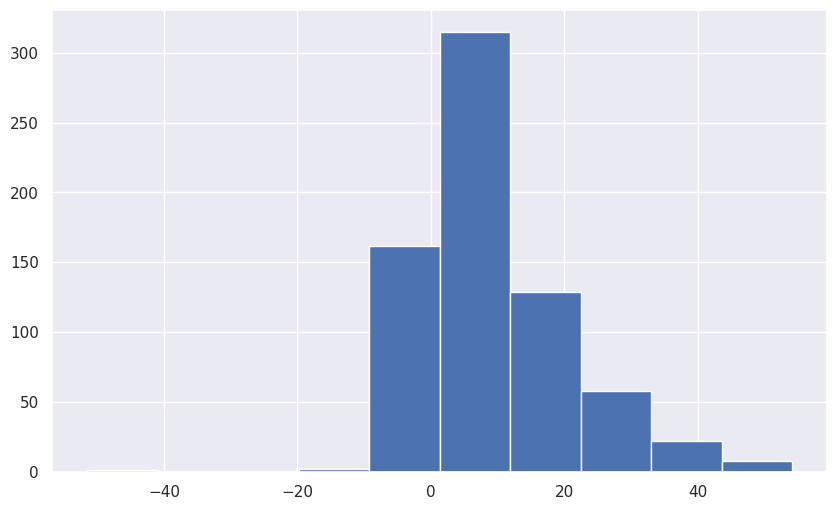

In [15]:
# plot the distribution of the play_pass_yards_air column
play_by_play['play_pass_yards_air'].hist()

In [16]:
# seperate those play_pass_yards_air by team that was on offense
play_by_play_offense = play_by_play[play_by_play['play_pass_yards_air'] > 0]

<Axes: >

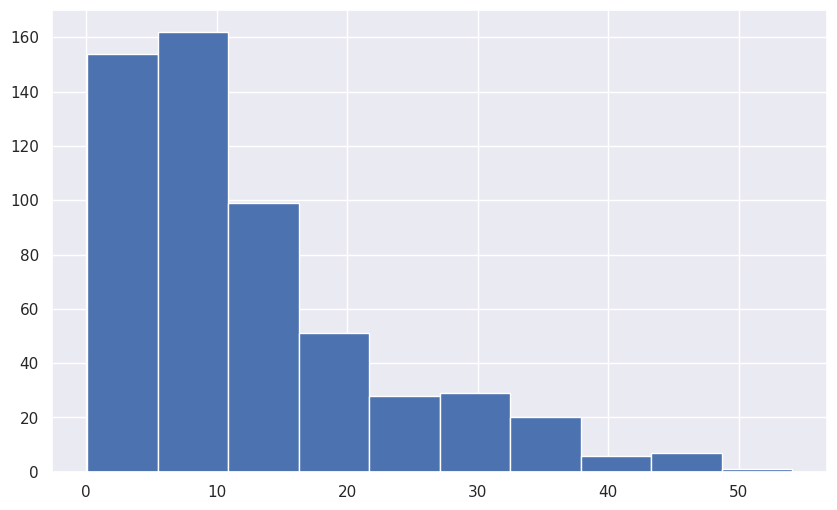

In [17]:
# plot the distribution of the play_pass_yards_air column
play_by_play_offense['play_pass_yards_air'].hist()

In [18]:
#seperate those play_pass_yards_air by team that was on offense by team name
play_by_play_offense_team = play_by_play_offense[play_by_play_offense['play_pass_yards_air'] > 0]

In [19]:
play_by_play_offense_team['team_name'].value_counts()

KeyError: ignored

In [20]:
play_by_play_offense_team['offense_team_name'].value_counts().head()

Ohio State Buckeyes          316
Arkansas State Red Wolves     30
Penn State Nittany Lions      27
Maryland Terrapins            25
Michigan Wolverines           23
Name: offense_team_name, dtype: int64

In [22]:

# Group the data by the 'team' column and calculate the sum of 'air yards' for each team
# (Assuming the teams are listed in a column named 'team' and the air yards are listed in a column named 'air_yards')
air_yards_by_team = play_by_play.groupby('offense_team_name')['play_pass_yards_air'].sum()

# Display the results
print(air_yards_by_team)


offense_team_name
Arkansas State Red Wolves     227.95
Indiana Hoosiers              263.77
Iowa Hawkeyes                 140.70
Maryland Terrapins            266.52
Michigan State Spartans       195.84
Michigan Wolverines           363.35
Northwestern Wildcats          73.86
Notre Dame Fighting Irish     211.78
Ohio State Buckeyes          3803.17
Penn State Nittany Lions      258.61
Rutgers Scarlet Knights       133.80
Toledo Rockets                313.31
Wisconsin Badgers             202.59
Name: play_pass_yards_air, dtype: float64


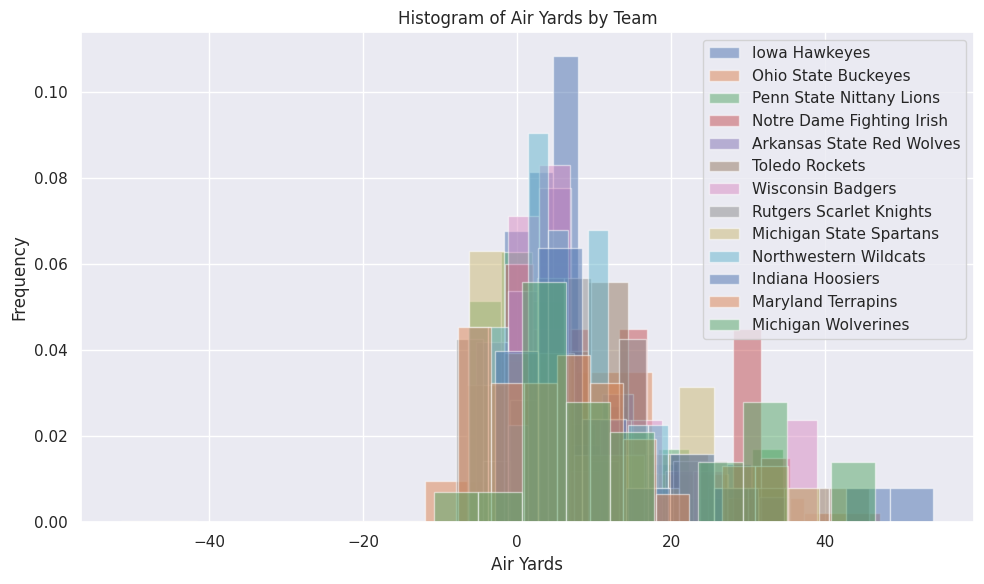

In [25]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/Ohio State 2022 Play by Play Data.csv')

# Get the unique team names (assuming the teams are listed in a column named 'team')
teams = df['offense_team_name'].unique()

# Set the number of bins for the histogram (optional)
num_bins = 10

# Create a histogram for each team
plt.figure(figsize=(10, 6))  # Set the figure size (optional)
for team in teams:
    # Filter the data for the current team
    team_data = df[df['offense_team_name'] == team]['play_pass_yards_air']
    
    # Plot the histogram (alpha is used for transparency)
    plt.hist(team_data, bins=num_bins, alpha=0.5, label=team, density=True)

# Customize the chart
plt.title('Histogram of Air Yards by Team')  # Set the title of the chart
plt.xlabel('Air Yards')  # Set the x-axis label
plt.ylabel('Frequency')  # Set the y-axis label
plt.legend(loc='upper right')  # Add a legend
plt.tight_layout()  # Adjust the layout for better spacing (optional)
plt.show()  # Display the chart